#  III.Apprentissage supervisé sur des données textuelles

In [1]:
import pandas as pd
sms = pd.read_table('./SMSSpamCollection.data', sep='\n', header=None, delimiter="\t")

In [2]:
sms.shape

(5572, 2)

In [3]:
sms.head(10)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
sms2=sms.set_index(0)
sms2.head(5)

,1
0,
ham,"Go until jurong point, crazy.. Available only ..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup fina...
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
type(sms)
len(sms)
sms.shape
sms[1][3]

'U dun say so early hor... U c already then say...'

On observe qu'on peut acceder au element de dataframe sms par sms[1][3] est la colone 1, ligne 3. Donc, premier element est la colone, qui est souvent l'inverse dans plus part des autres types.

In [6]:
for i in range(5):
    print(sms[1][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [7]:
sms3=[];spam=[]
for i in range(len(sms)):
    sms3.append(sms[1][i])
    spam.append(sms[0][i])
for i in range(3):
    print(i+1,"  ",spam[i], "  ",sms3[i])

1    ham    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2    ham    Ok lar... Joking wif u oni...
3    spam    Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [8]:
type(sms3[1])

str

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms3)

In [10]:
X.shape

(5572, 8713)

In [11]:
X.toarray()
X[0][0]


<1x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [12]:
type(X)

scipy.sparse.csr.csr_matrix

In [13]:
for i in range(10):
    print(spam[i],"   ", len(spam[i]))

ham     3
ham     3
spam     4
ham     3
ham     3
spam     4
ham     3
ham     3
spam     4
spam     4


In [14]:
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


In [15]:
X_train=X;
y_train=[]
for i in range(len(spam)):
    if len(spam[i])==3:
        y_train.append(0)
    elif len(spam[i])==4:
        y_train.append(1)

In [16]:
    
    print("Training: ")
    clf=(RidgeClassifier(tol=1e-2, solver="lsqr"))
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_train)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_train, pred)
    print("accuracy:   %0.3f" % score)


Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)


C:\Users\NgocBien\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.403s
test time:  0.001s
accuracy:   0.994


#### L'idée de cette méthode est de transformer tous les données textes en matrices de où les colones sont les mots de dictionnaires et les lignes sont des nombres de chaque mot correspondant dans chaque texte.  Après cette transformation, nous utilisons la méthode  de classification comme pour les données numériques normales.
#### Donc, avec la méthode de Ridge Classifier, nous avons un très bon score sur Training Data, 99,4%.  Si nous avons un test set, nous pourrions mieux évaluer la méthode.

In [17]:
    print("Training: ")
    clf=(Perceptron(n_iter=50))
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_train)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_train, pred)
    print("accuracy:   %0.3f" % score)

Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\NgocBien\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 2.558s
test time:  0.001s
accuracy:   1.000


    print("Training: ")
    clf=(KNeighborsClassifier(n_neighbors=10))
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_train)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_train, pred)
    print("accuracy:   %0.3f" % score)

    print("Training: ")
    clf=(PassiveAggressiveClassifier(n_iter=50))
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_train)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_train, pred)
    print("accuracy:   %0.3f" % score)

#### Méthode Tf-idf pour trouver de mots clés dans chaque texte

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [19]:
type(tfidf)
tfidf.shape

(5572, 8713)

In [20]:
k=0
for i in range(100):
    for j in range(100):
        if tfidf[i,j]>0:
            print(tfidf[i,j])
            k+=1
print(k)

0.235949890915
0.290224254503
0.193320517157
0.20711241868
0.322723904541
0.229764599532
0.250117111977
7


In [21]:
def run_classifiers(clf,X,Y):
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    Result=[]
    for i in clf:
        #Accuracy
        begin1 = time()
        cv_acc = cross_val_score(clf[i], X, Y, cv=kf)
        end1 = time()
        #AUC
        begin2=time()
        cv_auc = cross_val_score(clf[i], X, Y, cv=kf, scoring='roc_auc')
        end2=time()
        #Rappel
        begin3=time()
        cv_rappel = cross_val_score(clf[i], X, Y, cv=kf, scoring='recall') 
        end3=time()
        #Precision
        begin4=time()
        cv_precision = cross_val_score(clf[i], X, Y, cv=kf, scoring='precision') 
        end4=time()
        print("Accuracy for {0} is: {1:.3f}  in {2:.3f} sec".format(i, np.mean(cv_acc),end1-begin1))
        print("AUC for {0} is: {1:.3f}  in {2:.3f} sec".format(i, np.mean(cv_auc),end2-begin2))
        print("Recall for {0} is: {1:.3f}  in {2:.3f} sec".format(i, np.mean(cv_rappel),end3-begin3))
        print("Precision for {0} is: {1:.3f}  in {2:.3f} sec".format(i, np.mean(cv_precision),end4-begin4))
        print("\n")
        t=[i,[np.mean(cv_acc),end1-begin1]]
        Result.append(t)
    return Result

In [38]:
clfs = {
'RF': RandomForestClassifier(n_estimators=50),
'KNN': KNeighborsClassifier(n_neighbors=10),
'PAC':PassiveAggressiveClassifier(n_iter=50),
"PER": Perceptron(n_iter=50),
'RID': RidgeClassifier(tol=1e-2, solver="sag")
}

C:\Users\NgocBien\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\NgocBien\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [39]:
from sklearn.model_selection import KFold, cross_val_score
a=run_classifiers(clfs, X_train,y_train)
print(a)

Accuracy for RF is: 0.977  in 18.866 sec
AUC for RF is: 0.992  in 18.388 sec
Recall for RF is: 0.826  in 18.754 sec
Precision for RF is: 0.998  in 19.196 sec


Accuracy for KNN is: 0.893  in 1.493 sec
AUC for KNN is: 0.840  in 1.491 sec
Recall for KNN is: 0.203  in 1.475 sec
Precision for KNN is: 1.000  in 1.535 sec


Accuracy for PAC is: 0.985  in 0.325 sec
AUC for PAC is: 0.977  in 0.250 sec
Recall for PAC is: 0.905  in 0.235 sec
Precision for PAC is: 0.986  in 0.239 sec


Accuracy for PER is: 0.981  in 0.239 sec
AUC for PER is: 0.973  in 0.259 sec
Recall for PER is: 0.916  in 0.221 sec
Precision for PER is: 0.941  in 0.224 sec


Accuracy for RID is: 0.982  in 0.981 sec
AUC for RID is: 0.993  in 0.962 sec
Recall for RID is: 0.868  in 1.054 sec
Precision for RID is: 0.997  in 1.124 sec


[['RF', [0.97666857202663204, 18.866079330444336]], ['KNN', [0.8928558662276288, 1.4930853843688965]], ['PAC', [0.98492420156024829, 0.32501840591430664]], ['PER', [0.98133369830369299, 0.239013910293

In [31]:
print(a[0],"***********", a[0][0], "***********",a[0][1],"******",a[0][1][0])

['KNN', [0.8928558662276288, 1.6310932636260986]] *********** KNN *********** [0.8928558662276288, 1.6310932636260986] ****** 0.892855866228


In [46]:
def graphique(results):
 indices = np.arange(len(results))
 clf_names=[];score=[];training_time=[]
 for i in range(len(a)):
    clf_names.append(a[i][0])
    score.append(a[i][1][0])
    training_time.append(a[i][1][1])
 training_time = np.array(training_time) / np.max(training_time)
 plt.figure(figsize=(8, 6))
 plt.title("Score")
 plt.barh(indices, score, .2, label="score", color='navy')
 plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
 plt.yticks(())
 plt.legend(loc='best')
 plt.subplots_adjust(left=.25)
 plt.subplots_adjust(top=.95)
 plt.subplots_adjust(bottom=.05)

 for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

 plt.show()

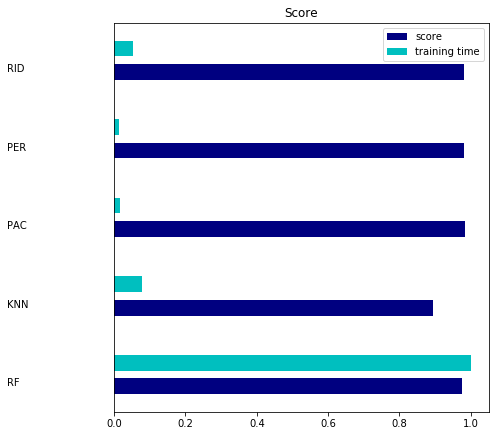

In [47]:
graphique(a)

#### Nous avons les méthodes Ridge Classifier, Perceptron,  Passive Agressive Classifier qui tournent en très peu de temps et qui donnent de bon résultat. La méthode K neighbors Classifier donne une prédiction moins précise et la méthode Random Forest Classifier donne le résultat meilleur que K neighbors Classifier mais qui tourne trop long. Donc, en ce cas, il vaut mieux d'utiliser les 3 premières méthodes, surtout quand la taille de donnée augmente. 
#### Si nous avons un ensemble de test nous pouvons mieux estimer ces méthodes, cas le fait de baser sur le score sur traing test peut être fausser, sur tout quand la méthode est over fit.

### Méthode Tf-idf 

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
tfidf.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [42]:
from sklearn.model_selection import KFold, cross_val_score
b=run_classifiers(clfs, tfidf,y_train)
print(b)

Accuracy for RF is: 0.978  in 18.675 sec
AUC for RF is: 0.992  in 18.845 sec
Recall for RF is: 0.816  in 18.353 sec
Precision for RF is: 0.999  in 18.481 sec


Accuracy for KNN is: 0.946  in 1.475 sec
AUC for KNN is: 0.974  in 1.437 sec
Recall for KNN is: 0.608  in 1.422 sec
Precision for KNN is: 0.996  in 1.434 sec


Accuracy for PAC is: 0.985  in 0.235 sec
AUC for PAC is: 0.990  in 0.254 sec
Recall for PAC is: 0.904  in 0.209 sec
Precision for PAC is: 0.980  in 0.209 sec


Accuracy for PER is: 0.980  in 0.185 sec
AUC for PER is: 0.986  in 0.224 sec
Recall for PER is: 0.899  in 0.189 sec
Precision for PER is: 0.947  in 0.186 sec


Accuracy for RID is: 0.980  in 0.400 sec
AUC for RID is: 0.994  in 0.453 sec
Recall for RID is: 0.857  in 0.416 sec
Precision for RID is: 0.994  in 0.362 sec


[['RF', [0.97846261603239648, 18.675068140029907]], ['KNN', [0.94615806973617467, 1.4750845432281494]], ['PAC', [0.98510341274122271, 0.23501348495483398]], ['PER', [0.97989775462720685, 0.18501067161

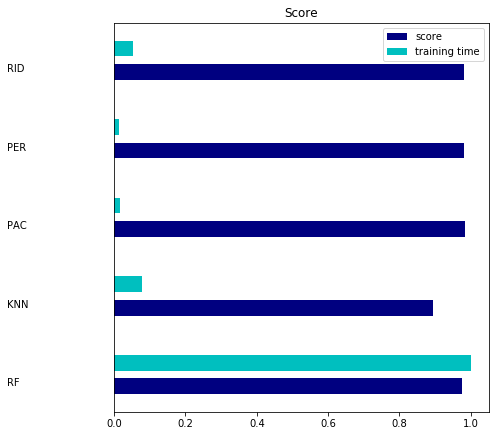

In [48]:
graphique(b)

#### Nous avons presque la même résultat en comparant avec la méthode précédente. C'est toujours la méthode Random Forest Classifier qui tourne pire. Après, les méthodes qui donnent toujours de bon résultat en peu de temps sont Ridge Classifier, Perceptron et Passive Agressive Classifier.

### Méthode sparse matrix:

In [61]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [66]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [67]:
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)

In [68]:
c=run_classifiers(clfs, X,y_train)

Accuracy for RF is: 0.959  in 15.626 sec
AUC for RF is: 0.980  in 15.406 sec
Recall for RF is: 0.719  in 15.574 sec
Precision for RF is: 0.983  in 16.232 sec


Accuracy for KNN is: 0.954  in 14.246 sec
AUC for KNN is: 0.962  in 13.090 sec
Recall for KNN is: 0.681  in 13.439 sec
Precision for KNN is: 0.961  in 12.923 sec


Accuracy for PAC is: 0.969  in 0.783 sec
AUC for PAC is: 0.984  in 0.755 sec
Recall for PAC is: 0.869  in 0.733 sec
Precision for PAC is: 0.937  in 0.925 sec


Accuracy for PER is: 0.962  in 0.739 sec
AUC for PER is: 0.984  in 0.658 sec
Recall for PER is: 0.915  in 0.702 sec
Precision for PER is: 0.837  in 0.609 sec


Accuracy for RID is: 0.970  in 1.432 sec
AUC for RID is: 0.985  in 1.386 sec
Recall for RID is: 0.825  in 1.405 sec
Precision for RID is: 0.944  in 1.554 sec




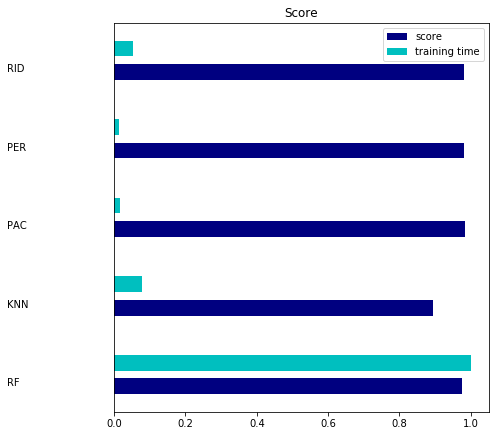

In [69]:
graphique(c)

#### En gros, cette méthode donne un meilleur résultat. Nous voyons ici moins de temps avec un score amélioré pour tous les 4 algorithmes.  Le temps réduit est compréhensible, car la dimensions de données est très fortement réduite de 5572 X 8713 à 5572 X 100.

   # IV. Détection d'anormalies

### 1. Jeu de données mouse.txt

In [111]:
import pandas as pd
mouse = pd.read_table('./mouse.txt', sep=' ', header=None)

In [112]:
mouse.shape

(500, 2)

In [113]:
mouse=mouse.values
type(mouse)

numpy.ndarray

In [114]:
print(mouse[1],"---------", mouse[1][0],"-----------",mouse[1][1])

[ 0.61  0.53] --------- 0.611378467222 ----------- 0.528624598889


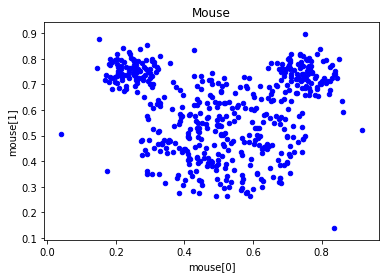

In [115]:
import matplotlib.pyplot as plt
for i in range(500):
 plt.scatter(mouse[i][0],mouse[i][1], s=20, c="blue")

plt.title('Mouse')
plt.xlabel('mouse[0]')
plt.ylabel('mouse[1]')
plt.savefig('mouse.png')
plt.show()

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(mouse)
y_pred= clf.predict(mouse)
print(y_pred)
sum(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1

400

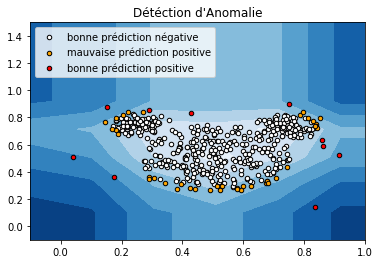

In [117]:


# couper le data en partie train et partie outlier
X = mouse
X_faux1=[]; X_faux2=[]; X1=[];X2=[];y=[]
X_out1=[];X_out2=[]
for i in range(490):
    y.append(1)
    if y_pred[i]==-1:
       X_faux1.append(X[i][0])
       X_faux2.append(X[i][1])
    elif y_pred[i]==1:
       X1.append(X[i][0])
       X2.append(X[i][1])
for i in range(10):
    y.append(-1)
    X_out1.append(X[i+490][0])
    X_out2.append(X[i+490][1])
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Détéction d'Anomalie")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
#####################################################
b1= plt.scatter(X1, X2, c='white', s=20, edgecolor='k')
b2= plt.scatter(X_faux1, X_faux2, c='orange', s=20, edgecolor='k')
c = plt.scatter(X_out1, X_out2, c='red',s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-0.1, 1))
plt.ylim((-0.1, 1.5))
plt.legend([b1,b2, c],
           ["bonne prédiction négative","mauvaise prédiction positive",
             "bonne prédiction positive"],
           loc="upper left")
plt.show()

Confusion matrix, without normalization
[[ 10  40]
 [  0 450]]
Normalized confusion matrix
[[ 0.2  0.8]
 [ 0.   1. ]]


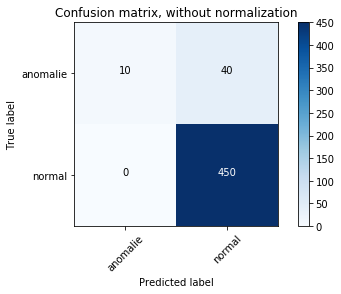

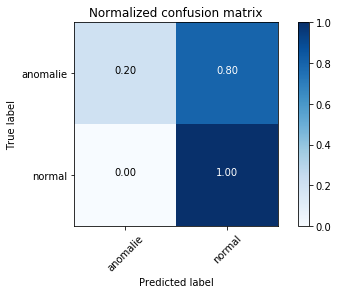

In [118]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
class_names=['anomalie','normal']
cnf_matrix = confusion_matrix(y_pred, y)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Nous avons déjà une bonne méthode qui a tout détecté les éléments anomaux. Cette méthode contient des erreurs quand il a mal prédit 40 éléments normaux, mais en gros nous avons un résultat acceptable.

### 2. Détéction d'anomalie sur des Cartes de Crédit:

In [1]:
import pandas as pd
credit = pd.read_table('./creditcard.csv', sep=",",header=0)

In [2]:
credit.shape

(284807, 31)

In [3]:
credit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.shape

(284807, 31)

In [5]:
credit=credit.values
type(credit)

numpy.ndarray

In [6]:
import numpy as np
credit=np.delete(credit,0,1)

from numpy import random
x=range(284807)
a=random.sample(x, 500)

In [7]:
credit.shape

(284807, 30)

In [8]:
credit[2,28]

378.66000000000003

In [9]:
k=0; data=[]; classe=[]
for i in range(len(credit)):
    if credit[i,29]==0 and k<5000:
        data.append(credit[i])
        k+=1
        classe.append(1)
    if  credit[i,29]==1:
        data.append(credit[i])
        classe.append(-1)
    
    

In [10]:
print(len(classe)," -----  ", len(data), "  k=", k)

5492  -----   5492   k= 5000


#### Prédiction des anomalies:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(10)#42
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(data)
y_pred= clf.predict(data)
sum(y_pred)

4392

#### can thuc hien ve hinh va dieu chinh tham so voi contamination

### 3. Détection d'anomalie des SMS

In [12]:
import pandas as pd
sms = pd.read_table('./SMSSpamCollection.data', sep='\n', header=None, delimiter="\t")

In [13]:
sms.shape

(5572, 2)

In [14]:
sms.head(5)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
sms3=[];spam=[]
for i in range(4000):
     if len(sms[0][i])==3:
        sms3.append(sms[1][i])
        spam.append(1)
k=0
print(len(sms3))
for i in range(4000):
    if len(sms[0][i])==4 and k<20:
        sms3.append(sms[1][i])
        spam.append(-1)
        k+=1
    if k ==20: 
        break
for i in range(3):
    print(i+1,"    ",sms3[i])

3466
1      Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2      Ok lar... Joking wif u oni...
3      U dun say so early hor... U c already then say...


In [29]:
len(sms3)

3486

#### Nous avons donc les données sms3 qui contient 3466 premiers sms normaux et 20 derniers sms spam.
#### Nous allons ensuite appliquer la méthode IsolationForest pour détecter les sms spams  dans sms3.

In [30]:
#Nous transformons les textes à une matrice numérique par la méthode bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(sms3)

In [31]:
X.shape # Donc, chaque sms est tranformé en une ligne de cette matrice numérique

(3486, 1000)

In [32]:
X[:,1].shape

(3486, 1)

In [33]:
type(X[1,1])

numpy.int64

In [34]:
#Nous appliquons la technique Isolation Forest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(10)#42
clf = IsolationForest(max_samples=20, random_state=rng)
clf.fit(X)
y_pred= clf.predict(X)
for i in range(10):
    print(y_pred[i])

1
1
1
1
1
1
-1
1
1
1


In [35]:
1-sum((y_pred+1)/2)/len(y_pred)

0.10011474469305792

#### Il donne une prédiction  de 10 % des données anomales. C'est très sur-estimé par rapport de  vraie 0,58%. Nous cherchons donc une méthode pour réduire cette erreur

In [36]:
from sklearn.preprocessing import StandardScaler as scaler
from sklearn import decomposition
X_norm=scaler().fit_transform(X.toarray())
pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
X_pca=pca.transform(X.toarray())
print(pca.singular_values_)
print(pca.explained_variance_ratio_)

C:\Users\NgocBien\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[ 202.64308426  192.22768964]
[ 0.01177975  0.01059997]


In [37]:
X_pca.shape

(3486, 2)

In [38]:
# Nous faisons une vusualization: 
# couper le data en partie train et partie outlier 
""" Faux1: predict spam mais sms est ham
    Faux2: Predict ham mais sms est spam
    True1: Bonne prediction de ham
    True2: Bonne prediction de spam
"""
X_faux1=[]; X_faux2=[]; X_true1=[];X_true2=[]
X_out1=[];X_out2=[]
for i in range(len(X_pca)):
    if y_pred[i]==-1:
        if spam[i]==1:
            X_true2.append(X_pca[i])
        else:
            X_faux1.append(X_pca[i])
       
    elif y_pred[i]==1:
        if spam[i] ==1:
            X_faux2.append(X_pca[i])
        else:
            X_true1.append(X_pca[i])

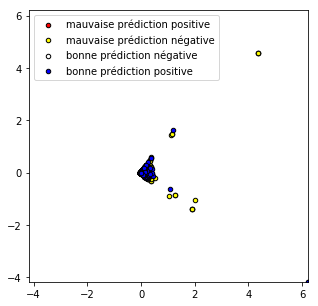

In [39]:
xy_max=max(np.amax(X_true1),np.amax(X_true2),np.amax(X_faux1), np.amax(X_faux2))
xy_min=min(np.amin(X_true1),np.amin(X_true2),np.amin(X_faux1), np.amin(X_faux2))
X_faux1=np.asarray(X_faux1);X_faux2=np.asarray(X_faux2);
X_true1=np.asarray(X_true1); X_true2=np.asarray(X_true2);
plt.figure(figsize=(5,5))
b1= plt.scatter(X_faux1[:, 0], X_faux1[:,1] , c='red', s=20, edgecolor='k')
b2= plt.scatter(X_faux2[:, 0], X_faux2[:,1] , c='yellow', s=20, edgecolor='k')
c1= plt.scatter(X_true1[:, 0], X_true1[:,1] , c='white', s=20, edgecolor='k')
c2= plt.scatter(X_true2[:, 0], X_true2[:,1] , c='blue', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((xy_min,xy_max))
plt.ylim((xy_min,xy_max))
plt.legend([b1,b2, c1,c2],
           ["mauvaise prédiction positive","mauvaise prédiction négative",
            "bonne prédiction négative", "bonne prédiction positive"],
           loc="upper left")
plt.show()

#### Là, en fait, on ne peut pas beaucoup à dire car ces 2 axes ont juste une contribution de 2 %  de variance total.
#### On assaie de faire une interprétation sur les erreurs de prédiction.

In [40]:
spam=[];j=0
for i in range(len(sms3)):
    if j<len(sms3)-20:
        spam.append(1)
        j+=1
    else:
        spam.append(-1)
    
a=0;b=0;c=0; s=[]; h=[]; sh=[]; k=20
for i in range(len(sms3)):
    if y_pred[i]==-1 and spam[i]==-1 and a <k:# bonne prédition spam
        a+=1
        s.append(sms3[i])
    if y_pred[i]==-1 and spam[i]==1 and b<k:#mauvaise prédiction spam
        b+=1
        h.append(sms3[i])
    if y_pred[i]==1 and spam[i]==-1 and c<k:#mauvaise prédiction ham
        c+=1
        sh.append(sms3[i])
    if a==k & b==k & c==k:
        break
print("-------------------True Spam-----------------------")
for i in range(a):
    print(i,":   ",s[i])
print("-------------------False Prediction Spam-------------")
for i in range(b):
    print(i, ":   ",h[i])
print("-------------------False Prediction Ham-------------")
for i in range(c):
    print(i, ":   ",sh[i])

-------------------True Spam-----------------------
0 :    FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
-------------------False Prediction Spam-------------
0 :    I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
1 :    Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you my sweet Arabian steed ... Mmmmmm ... Yummy
2 :    U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers.
3 :    Sorry my roommates took forever, it ok if I come by now?
4 :    Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.
5 :    Today is "song dedicated day.." Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...
6 : 

In [41]:
sum(spam)

3446

Confusion matrix, without normalization
[[   1  348]
 [  19 3118]]
Normalized confusion matrix
[[ 0.    1.  ]
 [ 0.01  0.99]]


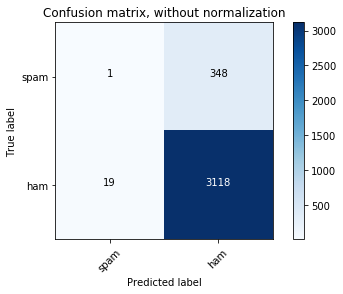

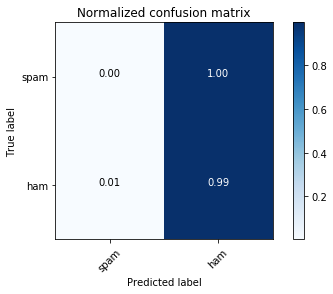

In [42]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
class_names=['spam','ham']
cnf_matrix = confusion_matrix(y_pred, spam)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Nous voyons ici une très mauvaise prédiction: Parmi 20 sms anormaux, la méthode détecte seulement une et il détecte 348 autres sms par erreurs. 
#### Nous allons donc changer la portion d'éléments anomaux:

Confusion matrix, without normalization
[[   0   20]
 [  20 3446]]
Normalized confusion matrix
[[ 0.    1.  ]
 [ 0.01  0.99]]


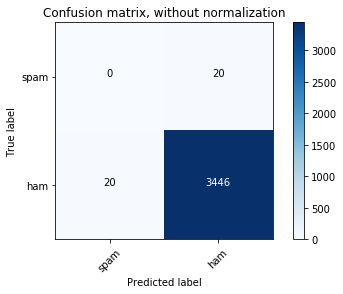

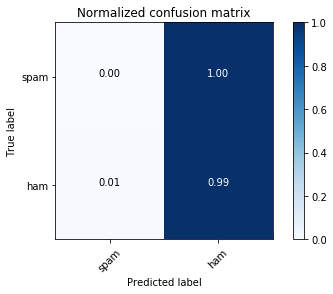

In [50]:
clf = IsolationForest(max_samples=20, random_state=rng, contamination=20/len(spam))
clf.fit(X)
y_pred= clf.predict(X)
cnf_matrix = confusion_matrix(y_pred, spam)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Mais cette fois-ci, la méthode se trompe totalement! Cette méthode donc ne foncionne pas correctement dans ce cas